# Value Iteration & Policy Iteration

On va utiliser l'exemple du monde grille simple. 

![Grid World](https://www.lamsade.dauphine.fr/~airiau/Teaching/M2-IASDapp-RL/gridworld.png)



On va numéroter les états comme suit:

| 7 | 8 | 9 | 10 |
|---|---|----|---|
| **4** |  - | **5** | **6**  |
| **0** | **1** | **2** | **3**  |

Les états finaux sont donc les états 6 et 10.

On a 4 actions disponibles, on les encode de la façon suivante:
* $\uparrow$: 0 
* $\leftarrow$ : 1
* $\downarrow$: 2
* $\rightarrow$ : 3

Ci-dessous, on a entré pour vous la matrice de transition $T$ et la matrice de récompense $R$. Ainsi $T[s_1,a,s_2]$ donne la probabilité d'atteindre l'état $s_2$ en ayant pris l'action $a$ dans l'état $s_1$ et $R[s,a]$ donne la récompense immédiate reçue après avoir pris l'action $a$ dans l'état $s$.

Vous pouvez facilement changer la pénalité pour avancer d'une case en changeant la valeur de la variable `penalty` ci-dessous.

Ce n'est peut-être pas la manière la plus élégante, mais cela suffira pour l'exercice!



In [1]:
import numpy as np
import matplotlib.pyplot as plt


l=0.8
s = 0.1
v_win = 1
v_lose = -1

T = np.zeros((11, 4, 11))
#UP
T[0,0,:]=[s, s, 0, 0, l, 0, 0, 0, 0, 0, 0 ] 
T[1,0,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,0,:]=[0, s, 0, s, 0, l, 0, 0, 0, 0, 0 ]
T[3,0,:]=[0, 0, s, s, 0, 0, l, 0, 0, 0, 0 ]
T[4,0,:]=[0, 0, 0, 0, 2*s, 0, 0, l, 0, 0, 0 ]
T[5,0,:]=[0, 0, 0, 0, 0, s, s, 0, 0, l, 0 ]
T[6,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,0,:]=[0, 0, 0, 0, 0, 0, 0, s+l, s, 0, 0 ]
T[8,0,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#LEFT
T[0,1,:]=[s+l, 0, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,1,:]=[l, 2*s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,1,:]=[0, l, s, 0, 0, s, 0, 0, 0, 0, 0 ]
T[3,1,:]=[0, 0, l, s, 0, 0, s, 0, 0, 0, 0 ]
T[4,1,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,1,:]=[0, 0, s, 0, 0, l, 0, 0, 0, s, 0 ]
T[6,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,1,:]=[0, 0, 0, 0, s, 0, 0, s+l, 0, 0, 0 ]
T[8,1,:]=[0, 0, 0, 0, 0, 0, 0, l, 2*s, 0, 0 ]
T[9,1,:]=[0, 0, 0, 0, 0, s, 0, 0, l, s, 0 ]
T[10,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
# DOWN
T[0,2,:]=[s+l, s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] 
T[1,2,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,2,:]=[0, s, l, s, 0, 0, 0, 0, 0, 0, 0 ]
T[3,2,:]=[0, 0, s, l+s, 0, 0, 0, 0, 0, 0, 0 ]
T[4,2,:]=[l, 0, 0, 0, 2*s, 0, 0, 0, 0, 0, 0 ]
T[5,2,:]=[0, 0, l, 0, 0, s, s, 0, 0, 0, 0 ]
T[6,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,2,:]=[0, 0, 0, 0, l, 0, 0, s, s, 0, 0 ]
T[8,2,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#RIGHT
T[0,3,:]=[s, l, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,3,:]=[0, 2*s, l, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,3,:]=[0, 0, s, l, 0, s, 0, 0, 0, 0, 0 ]
T[3,3,:]=[0, 0, 0, s+l, 0, 0, s, 0, 0, 0, 0 ]
T[4,3,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,3,:]=[0, 0, s, 0, 0, 0, l, 0, 0, s, 0 ]
T[6,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,3,:]=[0, 0, 0, 0, s, 0, 0, s, l, 0, 0 ]
T[8,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 2*s, l, 0 ]
T[9,3,:]=[0, 0, 0, 0, 0, s, 0, 0, 0, s, l ]
T[10,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

penalty= 0.00;
R = penalty*np.ones((11,4))
R[10,:]= np.ones(4)*v_win
R[6,:]= np.ones(4)*v_lose


In [2]:
R

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.]])

In [3]:
def printV(v):
    print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[7], v[8], v[9], v[10]))
    print('| {:03.2f} | ---- | {:03.2f} | {:03.1f} |'.format(v[4], v[5], v[6]))
    print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[0], v[1], v[2], v[3]))
  

In [4]:
# plot the best policy given the value function v:
# i.e. plot the best action for each state given the value function v.

def plotBestPolicy(v, gamma):
  bestV=np.zeros(11)
  bestA=np.zeros(11)
  fig, ax = plt.subplots()
  # policy extraction
  for s1 in range(11):
    val=[]
    for a in range(4):
      va=0
      for s2 in range(11):
        va += T[s1,a,s2]*v[s2]
      val= val+[ R[s1,a]+gamma*va ]
    bestV[s1]=np.max(val)
    bestA[s1]=np.argmax(val)

    matV= np.array( [[bestV[7], bestV[8], bestV[9], bestV[10]],
                    [bestV[4],   -1 , bestV[5], bestV[6]],
                    [bestV[0], bestV[1], bestV[2], bestV[3]]]
                    )
    matA = np.array([
                    [bestA[7], bestA[8], bestA[9], -1],
                    [bestA[4],   -1 , bestA[5], -1],
                    [bestA[0], bestA[1], bestA[2], bestA[3]]])

    im = ax.imshow(matV)


  for i in range(matV.shape[0]):
      for j in range(matV.shape[1]):
          if matA[i][j]==-1:
              arrow = ''
          elif matA[i, j] == 0:
              arrow = '^'
          elif matA[i, j] == 1:
              arrow = '<'
          elif matA[i, j] == 2:
              arrow = 'v'
          elif matA[i, j] == 3:
              arrow = '>'
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()

  plt.show() 
  

## Value Iteration
Implémentez l'algorithme d'itération sur les valeurs. Pour ce faire, implémentez une fonction qui prend en paramètre:
* $\epsilon$ le paramètre pour le test d'arrêt (dans un premier temps, vous pouvez remplacer ce paramètre par un nombre d'itérations maximal, comme dans l'appel ci-dessou)
* $\gamma$ le taux d'escompte (i.e. la valeur à l'instant t d'obtenir une unité de récompense à l'instant t+1)
* $T$ la matrice de transition
* $R$ la matrice de récompense

La méthode retourne le vecteur $v: S \rightarrow {\mathbb R}$ qui associe à chaque état la valeur optimale de cet état.

La fonction $printV$ ci-dessous affichera les valeurs de $v$ pour le problème du gridworld.

Vous pourrez ainsi tester si vous retrouvez les valeurs de l'exemple montré en cours. 

In [5]:
def valueIteration(nbr,taux,T,R):
    v=np.zeros(11)
    L=[]
    for k in range(nbr):
        v_initial=v.copy()
        for i in range(len(T)):
            v[i]=(R[i,:]+taux*np.dot(T[i,:,:],v)).max()
        x=max((abs(v-v_initial)))
        L.append(np.sum(v))
            
    return(v,L)

In [6]:
w,y_value = valueIteration(300, 0.9, T, R)
printV(w)

| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


Vous pouvez modifier la matrice de récompenses pour observer les différentes politiques optimales vues en cours. Peut-être en avons nous oublié?


## Policy Iteration

Implémentez l'algorithme d'itération sur les politiques. Pour débugger, vous pouvez dessiner la politique avec les fonctions ci-dessus (pour voir la fonction de valeur et/ou la politique associée).


In [10]:
import math
def policyIteration(nbr,gamma,T,R):
    #Initialisation du vecteur de valeurs
    v = np.ones(11)
    eps=0.0001
    #Initialisation de la politique
    #pi = np.random.randint(0,4,11)
    pi = [0 for s in range(11)]
    delta = 2*eps
    y=[]
    while(True):
        #Evaluation de la politique
        for i in range(nbr):
            #delta = 0
            v_initial=v.copy()
            for s in range(11):
                v[s] = ((R + np.dot(T[s,:,:], gamma*v))[s])[pi[s]]
            #x=max((abs(v-v_initial)))
            #print(x)
            y.append(np.sum(v))
            #delta=max(x,delta)
                
        #Amélioration de la politique
        
        policy_stable = True
        for s in range(11):
            b = pi[s]
            pi[s] = np.argmax((R + np.dot(T[s,:,:], gamma*v))[s])
            if(b != pi[s]):
                policy_stable = False
        if(policy_stable):
            break
        
    return(v,pi,y)

In [11]:
w,pi,y_policy=policyIteration(100,0.9,T,R)
print("n'a pas assez de precision sur python c'est pour ça on ne peut pas utiliser while delta>eps")

n'a pas acces de precision sur python c'est pour ça on ne peut pas utilise while delta>eps


In [12]:
printV(w)


| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


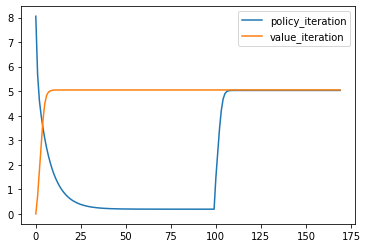

In [78]:
plt.plot(y_policy[:170])
plt.plot(y_value[:170])
plt.legend(['policy_iteration', 'value_iteration'])
